In [2]:
# 必要なライブラリをインストール
!pip install pandas numpy matplotlib

In [3]:
# 必要なライブラリをimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl

# スタイルやフォントを調整
mpl.style.use('default')
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [4]:
# データ入力補助用関数

# csvを読み込んでpandas.DataFrameを返す関数
def get_csv(filename): 
    return pd.read_csv(filename, encoding="UTF-8", delimiter=',' )


# 一行目にヘッダーがないcsvを読み込んでpandas.DataFrameを返す関数
def get_csv_without_header(filename):
    return pd.read_csv(filename, encoding="UTF-8", delimiter=',', header=None)


In [5]:
#  描画の初期化用関数

#  正方形の描画領域を作成する関数
def init_figure():
    plt.figure(figsize = (7,7), dpi = 100)
    plt.grid(which="both")
    
# 横長の描画領域を作成する関数
def init_figure_wide():
    plt.figure(figsize = (10,7), dpi = 100)
    plt.grid(which="both")

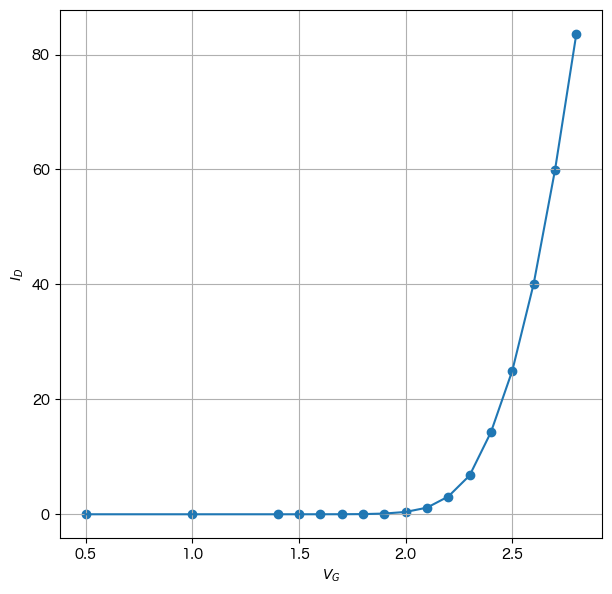

In [6]:
# 普通のプロットの例
def plot():
    init_figure() # 初期化
    
    data = get_csv("example_input.csv") # 実験データを読み込み
    
    plt.scatter(data["V_G"],data["I_D"]) # x軸をV_gに、y軸をI_dにして散布図を表示
    
    plt.plot(data["V_G"],data["I_D"]) # x重ねて別の描画をすることができる (今回は折れ線)
    
    plt.xlabel("$V_G$") #x軸の名前を指定 (TeX形式で書ける)
    plt.ylabel("$I_D$") #y軸の名前を指定

    plt.savefig("example_output.png") # プロットした結果を画像で保存する
    
plot()

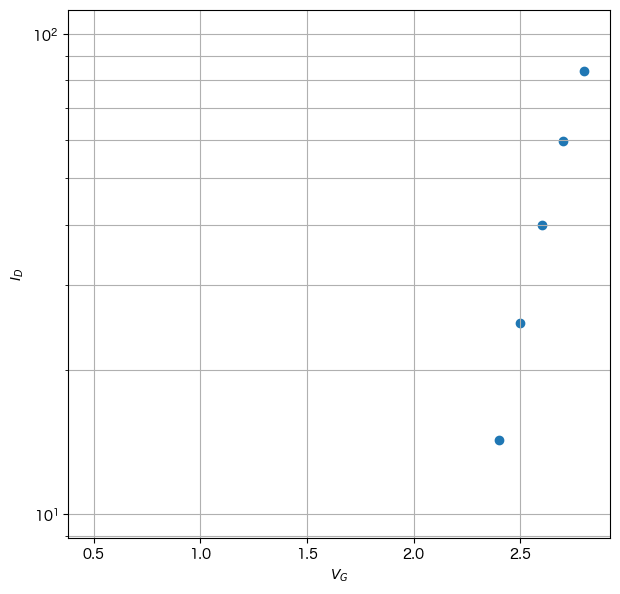

In [7]:
# 片対数プロットの例
def semi_log_plot():
    init_figure() # 初期化
    
    data = get_csv("example_input.csv") # 実験データを読み込み
    
    plt.scatter(data["V_G"],data["I_D"]) 
    plt.yscale('log') # 片対数で表示する
    
    plt.xlabel("$V_G$")
    plt.ylabel("$I_D$") 

    
    plt.savefig("example_output_semi_log.png") # プロットした結果を画像で保存する
    
semi_log_plot()

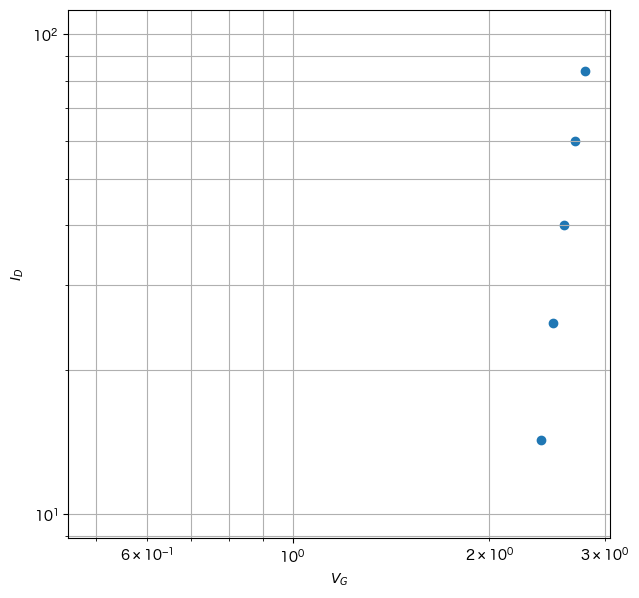

In [8]:
# 両対数プロットの例
def log_log_plot():
    init_figure() # 初期化
    
    data = get_csv("example_input.csv") # 実験データを読み込み
    
    plt.scatter(data["V_G"],data["I_D"]) 

    # 両対数で表示する
    plt.xscale('log') 
    plt.yscale('log') 
    
    plt.xlabel("$V_G$")
    plt.ylabel("$I_D$") 

    
    plt.savefig("example_output_log_log.png") # プロットした結果を画像で保存する
    
log_log_plot()

/Users/plus/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
/Users/plus/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
/Users/plus/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/plus/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/plus/.pyenv/ver

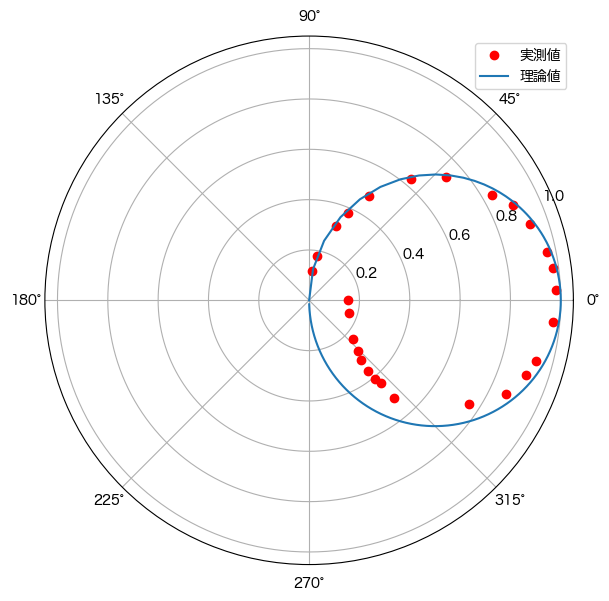

In [9]:
# 極座標プロットの例
def polar_plot():
    
    # 実験で使用した素子の値
    E = 1
    L = 10 * 10**-3
    R = 100
    C = 0.1 * 10**-6
    
    # 理論値の計算
    freq_array = np.linspace(0, 100000000, 500000) 
    omega_array = 2 * np.pi * freq_array
    v = (1j * omega_array * L) / (R - omega_array**2 * L * C + 1j * omega_array * L)
    theta = np.angle(v)
    absolute = np.abs(v)


    data = pd.read_csv("example_polar_input.csv") # 実験データを読み込み

    init_figure() # 初期化
    plt.polar(np.deg2rad(data["位相差"]), data["CH2"]/data["CH1"],  'ro',  label="実測値")
    plt.polar(theta, absolute, label="理論値")

    plt.legend() # 凡例を表示
    
    plt.savefig("example_polar_output.png")

polar_plot()